In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.join("..", "paper-2"))
from orion_util import get_lines, get_params

sys.path.insert(0, os.path.join("..", "paper-2", "data"))
from helpers import prepare_data, select_envs

In [2]:
def convert_unit(T, nu, dv):
    """
    [T]: K
    [nu]: Hz
    [dv]: km.s^-1
    """
    kb = 1.380_649e-23 # m^2.kg.s^-2.K^-1
    c = 299_792_458 # m.s^-1
    return (2 * 1e6 * (nu/c)**3 * kb) * T * dv

In [3]:
nu_dict = {
    "13co10": 110.20487854327956,
    "hcop10": 89.18072984784203,
}

dv = 0.5

In [4]:
line_names, param_names = get_lines(), get_params()
lines, params = prepare_data(line_names, param_names)

lines, params = select_envs(lines, params, ["full"])

line_names, param_names

(['12cn10',
  '12co10',
  '12cs21',
  '13co10',
  '32so21',
  'c3h2',
  'c17o10',
  'c18o10',
  'cch10',
  'ch3oh21',
  'h2co',
  'h13cop10',
  'hcn10',
  'hcop10',
  'hnc10',
  'n2hp10'],
 ['av', 'g0'])

In [5]:
filt = (params[:, 0] > 3) & (params[:, 0] < 25) & (params[:, 1] > 10**1) & (params[:, 1] < 10**2.4)

lines, params = lines[filt], params[filt]

/tmp/ipykernel_1362217/2771752060.py:5: RuntimeWarning: invalid value encountered in log10
  intens = np.log10(intens)


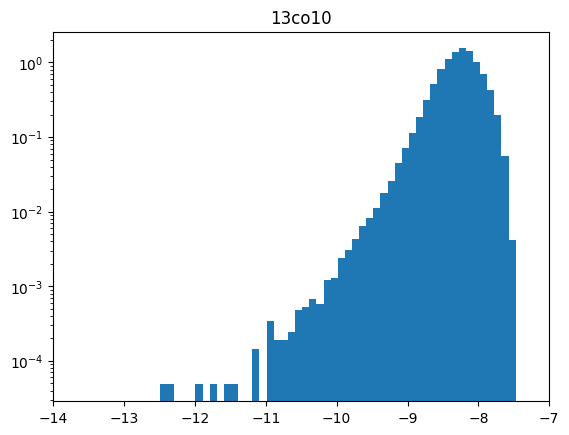

In [6]:
linename = "13co10" 

intens = lines[:, line_names.index(linename)]
intens = convert_unit(intens, 1e9*nu_dict[linename], dv)
intens = np.log10(intens)

plt.hist(intens, bins=50, density=True)

plt.yscale("log")
plt.title(linename)
plt.xlim([-14, -7])

plt.show()

/tmp/ipykernel_1362217/2347230618.py:5: RuntimeWarning: invalid value encountered in log10
  intens = np.log10(intens)


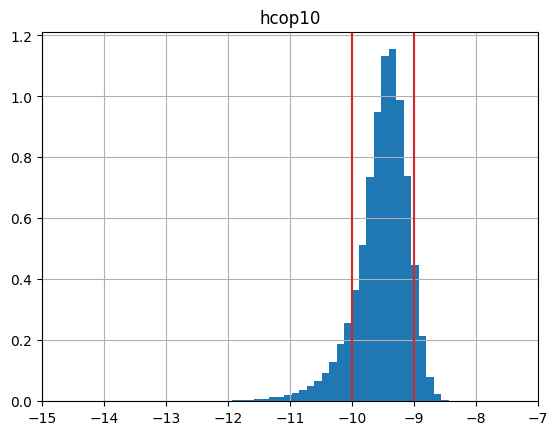

In [7]:
linename = "hcop10" 

intens = lines[:, line_names.index(linename)]
intens = convert_unit(intens, 1e9*nu_dict[linename], dv)
intens = np.log10(intens)

plt.hist(intens, bins=50, density=True)

plt.title(linename)
plt.xlim([-15, -7])

plt.axvline(-10, color="tab:red")
plt.axvline(-9, color="tab:red")

plt.grid()

plt.show()

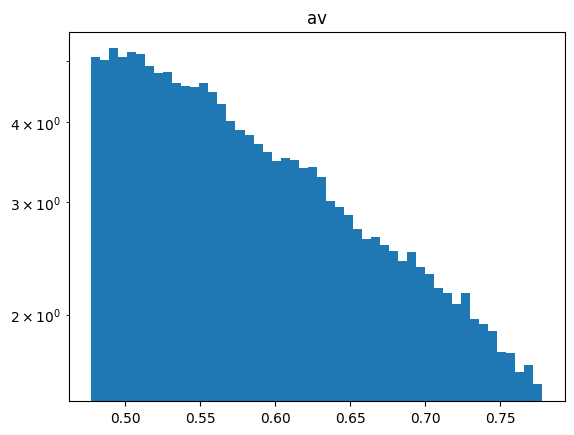

In [8]:
intens = params[:, param_names.index("av")]
intens = np.log10(intens)

plt.hist(intens, bins=50, range=(np.log10(3), np.log10(6)), density=True)

plt.yscale("log")
plt.title('av')
# plt.xlim([np.log10(3), np.log10(6)])

plt.show()

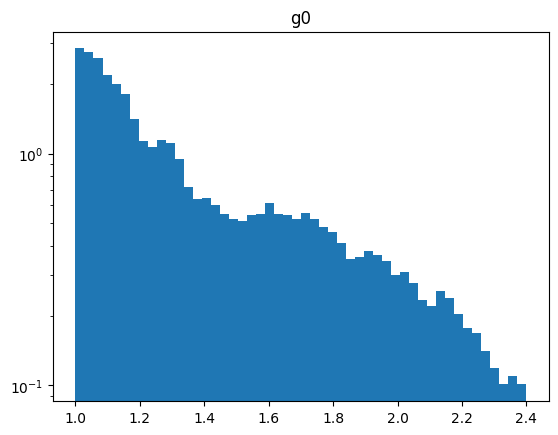

In [9]:
intens = params[:, param_names.index("g0")]
intens = np.log10(intens)

plt.hist(intens, bins=50, range=(np.log10(1e1), np.log10(10**2.4)), density=True)

plt.yscale("log")
plt.title('g0')
# plt.xlim([np.log10(3), np.log10(6)])

plt.show()

/tmp/ipykernel_1362217/1869680599.py:4: RuntimeWarning: invalid value encountered in log10
  intens = np.log10(intens)


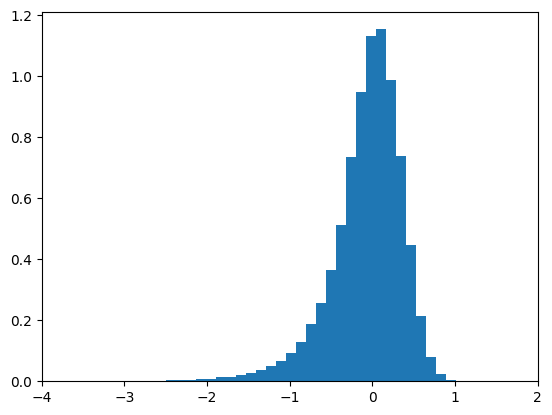

In [10]:
linename = "hcop10" 

intens = lines[:, line_names.index(linename)]
intens = np.log10(intens)

noise = convert_unit(0.457, nu_dict[linename], dv)

snr = intens-noise

#

plt.hist(snr, bins=50,density=True)
plt.xlim([-4, 2])

plt.show()

/tmp/ipykernel_1362217/1598285078.py:3: RuntimeWarning: invalid value encountered in log10
  c=np.log10(lines[:, line_names.index(linename)])-noise,


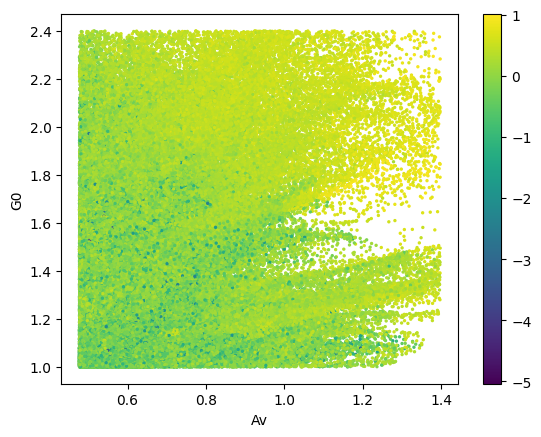

In [11]:
plt.scatter(
    np.log10(params[:, 0]), np.log10(params[:, 1]),
    c=np.log10(lines[:, line_names.index(linename)])-noise,
    s=2
)
plt.xlabel("Av")
plt.ylabel("G0")
plt.colorbar()
plt.show()

/tmp/ipykernel_1362217/1600693300.py:3: RuntimeWarning: invalid value encountered in log10
  c=np.log10(lines[:, line_names.index("13co10")])-noise,


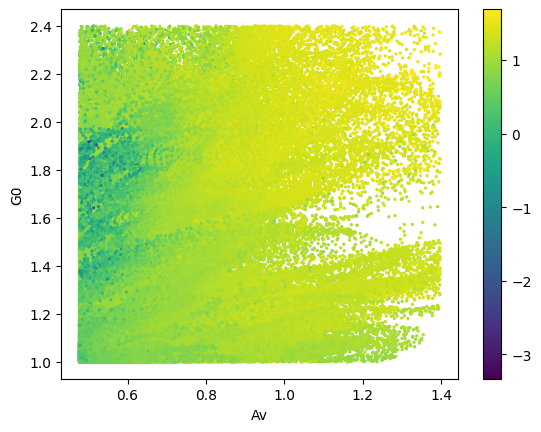

In [12]:
plt.scatter(
    np.log10(params[:, 0]), np.log10(params[:, 1]),
    c=np.log10(lines[:, line_names.index("13co10")])-noise,
    s=2
)
plt.xlabel("Av")
plt.ylabel("G0")
plt.colorbar()
plt.show()